# Lab 0: Introduction to Python

The file `intro.py` presents part of the Python syntax:

- Create organized *Header Blocks*.
- Conditionals
- Explore main Data Structures
- Loops
- Functions
- Import Python packages with PIP


In this section, we present more examples on conditionals, loops and functions using **Jupyter notebooks**.

- IPython is a kernel behind Jupyter notebooks that makes working interactively convenient and efficient.
- It is the way to go when is about Scientific Computing and Data Mining
- Allows to combine codes with text through `MarkDown` language and $\LaTeX$

For example, some repositories with Jupyter notebooks are:

- https://github.com/jupyter/jupyter/wiki#a-gallery-of-interesting-jupyter-notebooks
- https://nbviewer.jupyter.org/



## Activity 1: Design of Custom Functions from Jupyter

Some of the homeworks will require you to **design your own functions**. As an example, we explain below how to create a function to calculate the `mean` in a multidimensional `numpy` array. This function is already incorporated in the numpy package, but we will use it as a simple example to learn how to design functions from a Jupyter notebook.

The lab includes these steps:
- Construction of 2D arrays in `numpy`
- Create a function to calculate the `mean` of the array per axis
- Test the function in Jupyter notebook
- Load a dataset from a file
- Show some visualizations

In [1]:
# Import packages
# Numpy is useful for data analysis
import numpy as np

D:\Conda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Conda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Conda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Create a 2D array
Create a 2D numpy array with size `(10,5)`. The numbers to fill in the array are created pseudo-randomly.

In [2]:
# Guarantees that the pseudo-random process is always going to show the same results. 
# Provides repeatability of experiments
np.random.seed(12345)

In [3]:
array_in_2D = np.random.randint(0, 100, size=(10,5))
array_in_2D

array([[98, 29,  1, 36, 41],
       [34, 29,  1, 59, 14],
       [91, 80, 73, 11, 77],
       [10, 81, 82, 38,  7],
       [43, 23, 29, 56, 55],
       [31, 61, 97, 91, 87],
       [36, 64,  3,  5, 15],
       [75, 14, 81,  5, 34],
       [53, 72,  5, 98,  5],
       [59, 83, 12, 14, 80]])

In [4]:
# Example of how to access a specific value
# Access to the list in the index 2 (i.e. [91,80,73,11,77]), and then the element in the index 3. (i.e. 11)
array_in_2D[2,3] 

11

In [5]:
array_in_2D.shape # Method to extract the size of the numpy array

(10, 5)

In [6]:
array_in_2D.max() # Function to calculate the maximum in the array

98

In [7]:
array_in_2D.mean() # Calculate the mean over all the elements

45.56

### Create a function to calculate the `mean` of the array per axis

The function needs to have a parameter `axis` which can take either None, 0 or 1. If None, it averages over all elements. If 0, it averages vertically downwards across rows (in our example, result is an array of length 5). If 1, it averages horizontally across columns (in our example, result is an array of length 10).

**NOTE: The concept of `axis` in numpy arrays is one of the most important concepts for data analysis, but at the same time one of the hardest to comprehend. Please refer to the [official explanation](https://numpy.org/doc/stable/glossary.html) to familiarize yourself with this parameter.** 

In [8]:
def calculate_mean_2D_array(input_array, axis=None):
    """
    This function uses numpy methods to calculate the 
    mean of a 2D numpy array according to the specified axis.

    Input:
        input_array: 2D numpy array
        axis: Defines how to perform the calculation of the mean
            axis=None (default) - Average all the values in the array
            axis=0 - running vertically downwards across rows
            axis=1 - running horizontally across columns
    Output:
        A single value (if axis=None) or an array containing
        the mean of the elements along the specified axis
    """

    # Local Variables
    result = None   # This variable will contain the final result

    # Help variables for the function
    nrows, ncols = input_array.shape # Extracts the size of the array
    N = nrows * ncols

    # Average over all the elements
    if axis == None:
        # Help variable to store cumulative sum
        cumsum = 0
        # Access each row from the array
        for i in range(nrows):
            # Access each value from the row
            for j in range(ncols):
                # Add to the cumulative sum
                cumsum += input_array[i,j]
        # Calculate total average
        result = cumsum / N

    # Average vertically downwards across rows
    elif axis == 0:
        # The result is a list, in which we will append respective values 
        result = []
        # Access each row from the array
        for j in range(ncols):
            # Sum ALL the elements from the column
            #   and divide by number of elements
            average = input_array[:,j].sum() / nrows
            # Append the value to the result
            result.append(average)
        # Convert from list to numpy array
        result = np.array(result)

    # Average horizontally across columns
    elif axis == 1:
        # The result is a list, in which we will append respective values 
        result = []
        # Access each row from the array
        for i in range(nrows):
            # Sum ALL the elements from the row
            #   and divide by number of elements
            average = input_array[i,:].sum() / ncols
            # Append the value to the result
            result.append(average)
        # Convert from list to numpy array
        result = np.array(result) # Convert from list to numpy array
    
    # Return the variable to the object that called this function
    return result

### Test the function from the Jupyter notebook

In [9]:
# Result custom function with no specific axis
calculate_mean_2D_array(array_in_2D)

45.56

In [10]:
calculate_mean_2D_array(array_in_2D, axis=0)

array([53. , 53.6, 38.4, 41.3, 41.5])

In [11]:
calculate_mean_2D_array(array_in_2D, axis=1)

array([41. , 27.4, 66.4, 43.6, 41.2, 73.4, 24.6, 41.8, 46.6, 49.6])

### Compare the result with built-in function

The function that we have created already exists in numpy (see [here](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)).

Then we can use the implemented function to validate our results, we just need to call the method `.mean()` and the parameter `axis`.

In [12]:
# Result of mean among all elements
array_in_2D.mean()

45.56

In [13]:
# Result of mean in axis 0 []
array_in_2D.mean(axis=0)

array([53. , 53.6, 38.4, 41.3, 41.5])

In [14]:
# Result of mean in axis 1
array_in_2D.mean(axis=1)

array([41. , 27.4, 66.4, 43.6, 41.2, 73.4, 24.6, 41.8, 46.6, 49.6])

As we can see, the results from our custom function `calculate_mean(input_array, axis=0)` returns the same values than the built-in function `array_in_2D.mean(axis=0)`.

# Load a dataset from a file
Lastly, we will create a simple example to load the iris dataset and perform basic plots using pandas and seaborn

In [15]:
# Pandas enables simple data structures called dataframes (resemble Excel spreadsheets)
import pandas as pd

# Data visualization using Matpotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
dataset_iris = pd.read_csv("./iris.csv")

In [17]:
## Exploring my dataset:
## 1. How many rows does the iris dataset have?
## 2. What are min, max, mean, etc., values of each columns?
## 3. How many different species do we have?
## ...
dataset_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


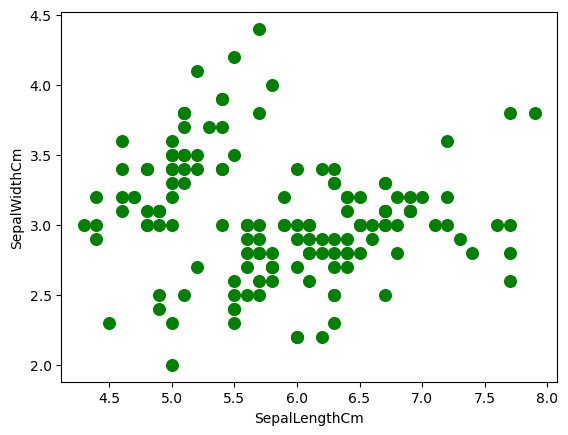

In [18]:
# Pandas includes scripts to directly make some basic plots
dataset_iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="green", s=70)
plt.show()

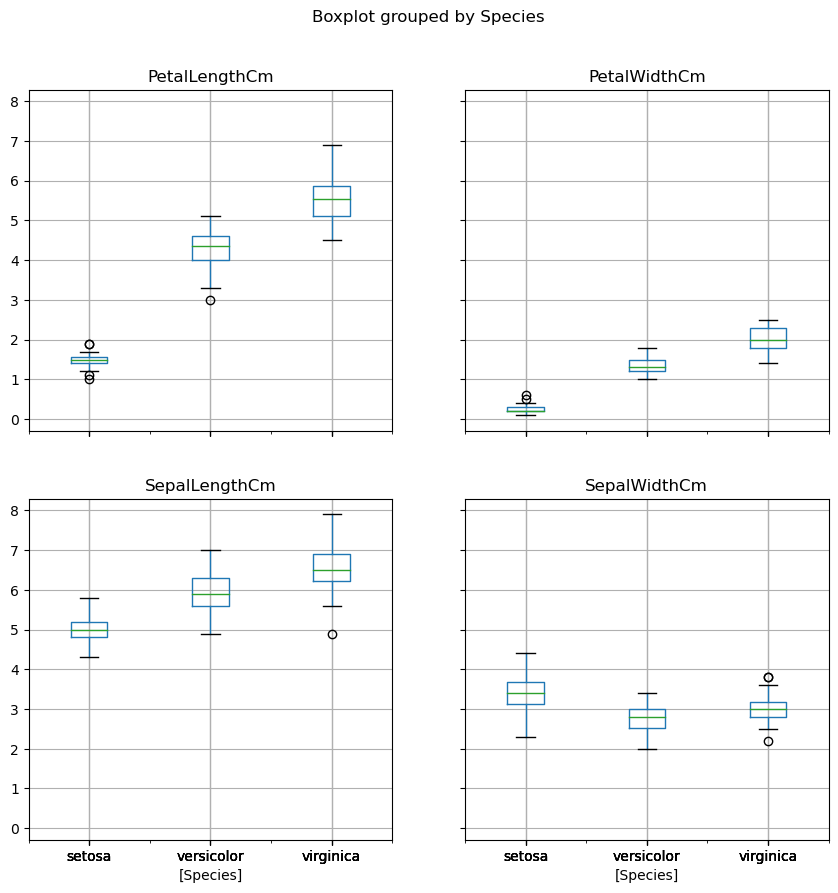

In [19]:
## Modify the figsize, by placing a value in the X and Y cordinates
dataset_iris.boxplot(by="Species", figsize=(10, 10))
plt.show()

In [ ]:
sns.pairplot(dataset_iris, hue="Species", height=3)
plt.show()

## `NOTE:` Remember to **Restart the Kernel** from time to time to guarantee that the notebook works properly when you press **Run All**

# End of Lab 0